In [1]:
import numpy as np

In [2]:
vggt_preds = np.load('vggt_preds.npz', allow_pickle=True)
vggt_preds = vggt_preds['arr_0'][()]

In [3]:
percentile = np.percentile(vggt_preds['depth_conf'], 40)
mask = vggt_preds['depth_conf'] > percentile

In [4]:
from PIL import Image

img_path_list = [
    f"zacatecas/calderon_{i}.jpeg"
    for i in range(1, 6)
]
imgs = [
    Image.open(f"zacatecas/calderon_{i}.jpeg")
    for i in range(1, 6)
]
imgs_reshaped = np.array([
    img.resize((518, 392))
    for img in imgs
])/255

In [5]:
imgs_reshaped[~mask] = 0

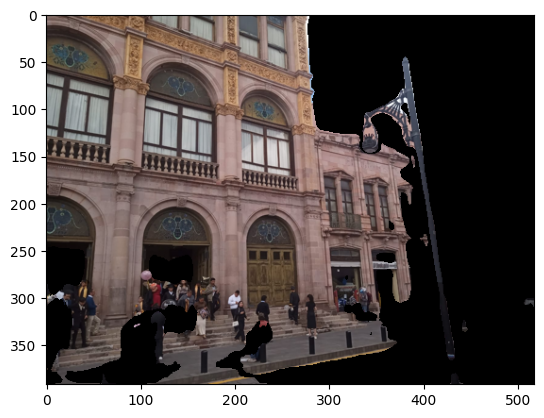

In [6]:
import matplotlib.pyplot as plt

plt.imshow(imgs_reshaped[3])

In [7]:
import open3d as o3d

point_cloud = o3d.geometry.PointCloud()

points = vggt_preds['world_points_from_depth'][mask].reshape(-1, 3)
colors = imgs_reshaped[mask].reshape(-1, 3)

point_cloud.points = o3d.utility.Vector3dVector(points)
point_cloud.colors = o3d.utility.Vector3dVector(colors)

In [8]:
o3d.visualization.draw_geometries([point_cloud])